In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting

import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["2mu2e", "2mu2e_matchedLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

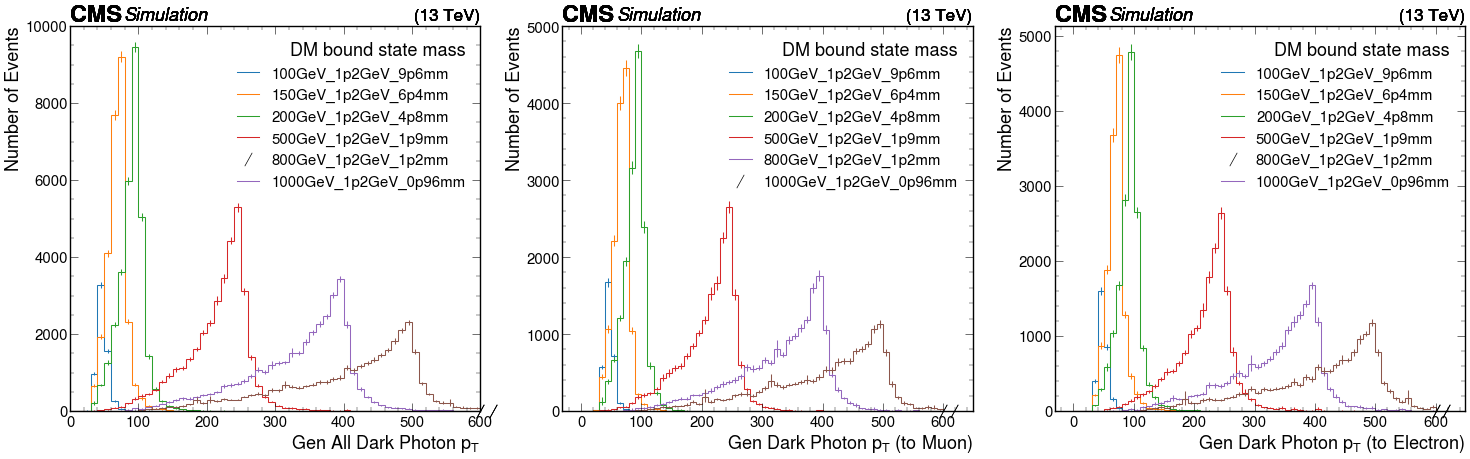

In [4]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[0], :600j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Dark Photon $p_{T}$")
    plt.ylabel("Number of Events")
    plt.xlim(0,600)
    plt.ylim(0,10000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toMu_pt"][channels[0], :600j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Dark Photon $p_{T}$ (to Muon)")
    plt.ylabel("Number of Events")

plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toE_pt"][channels[0], :600j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Dark Photon $p_{T}$ (to Electron)")
    plt.ylabel("Number of Events")
    

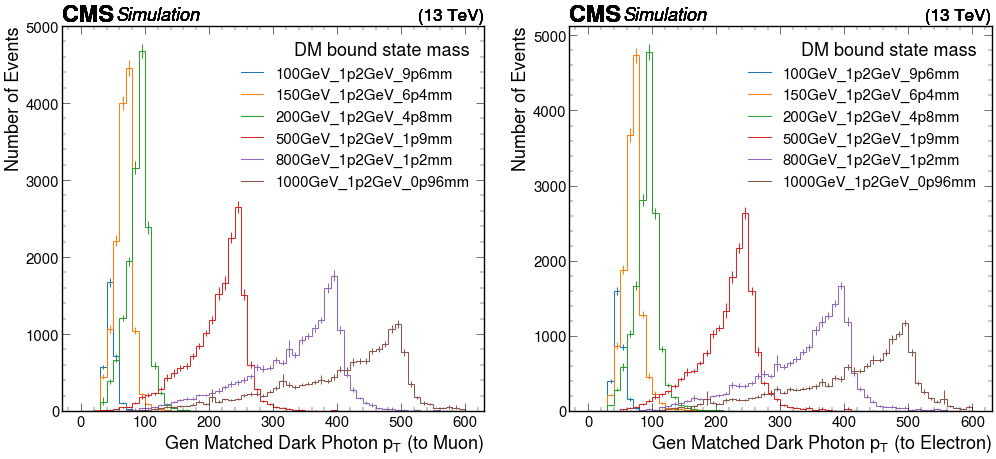

In [3]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toMu_matched_muLj_pt"][channels[0], :600j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Matched Dark Photon $p_{T}$ (to Muon)")
    plt.ylabel("Number of Events")
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toE_matched_egmLj_pt"][channels[0], :600j], density=False)
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Matched Dark Photon $p_{T}$ (to Electron)")
    plt.ylabel("Number of Events")

In [12]:
out[sample]["counters"]['0']

{'2mu2e': {'Total LJs': 57953,
  'Gen As to muons': 28872,
  'Gen As to electrons': 28872,
  'Matched gen As to muons': 28856,
  'Matched gen As to electrons': 28766},
 '2mu2e_matchedLj': {'Total LJs': 57450,
  'Gen As to muons': 28725,
  'Gen As to electrons': 28725,
  'Matched gen As to muons': 28725,
  'Matched gen As to electrons': 28725}}